# Trabajo Práctico 2: Regresión

El objetivo de este trabajo práctico es desarrollar y evaluar diversos modelos de regresión para estimar el precio de venta de una SUV (Sport Utility Vehicle) de Toyota. El dataset **Precios de SUVs** contiene información sobre los precios en dólares de tres modelos de vehículos SUV de la marca Toyota, publicados en la página de Mercado Libre Argentina. Además, incluye características adicionales relacionadas con cada publicación. Previamente, el conjunto de datos fue dividido en subconjuntos de desarrollo (`toyota_dev.csv`) y prueba (`toyota_test.csv`).

**Nota:** La implementación de las funciones y/o clases debe realizarse utilizando exclusivamente la librería NumPy. No se permite el uso de librerías de Machine Learning como scikit-learn, TensorFlow, Keras, PyTorch, XGBoost, o LightGBM.

1. **Visualización de Datos**

   Utiliza el dataset de desarrollo para crear una serie de gráficos que exploren las relaciones entre diferentes variables. Las visualizaciones deben ayudarte a identificar patrones y tendencias en los datos. Utiliza las librerías Matplotlib o Seaborn para esta tarea.

    - Visualiza cómo varía el precio en dólares en función de los kilómetros recorridos por el vehículo. ¿Observas la misma tendencia para los diferentes modelos?
    - Compara la distribución de precios en dólares entre los distintos modelos de SUV. ¿Identificas la presencia de outliers? ¿Qué acciones tomarías con ellos?
    - Analiza la distribución del precio en dólares según el año del vehículo.
    - Evalúa la utilidad de la variable categórica **Color**. ¿Existen diferencias significativas en el precio según el color del vehículo? ¿Hay algún modelo cuyo precio parezca estar influenciado por el color?
    - Compara cómo varía el precio según el tipo de combustible utilizado. ¿Hay algún modelo cuyo precio esté condicionado por el tipo de combustible?
    - Compara los precios en función del tipo de transmisión del vehículo.
    - Analiza la distribución de los modelos por año. ¿Puedes identificar si ciertos modelos son más comunes en años específicos?
    - **OPCIONAL**: Agrega una o más visualizaciones adicionales que consideres útiles para obtener insights valiosos y mejorar la comprensión del dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_dev = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TPs/TP2/Data/toyota_dev.csv")
df_test = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TPs/TP2/Data/toyota_test.csv")

a) Visualiza cómo varía el precio en dólares en función de los kilómetros recorridos por el vehículo. ¿Observas la misma tendencia para los diferentes modelos?

In [3]:
# Primero transformamos la variable km a numerica
df_dev['Kilómetros'] = df_dev['Kilómetros'].str.replace('km', '').str.replace(',', '').str.strip()
df_dev['Kilómetros'] = df_dev['Kilómetros'].astype(int)

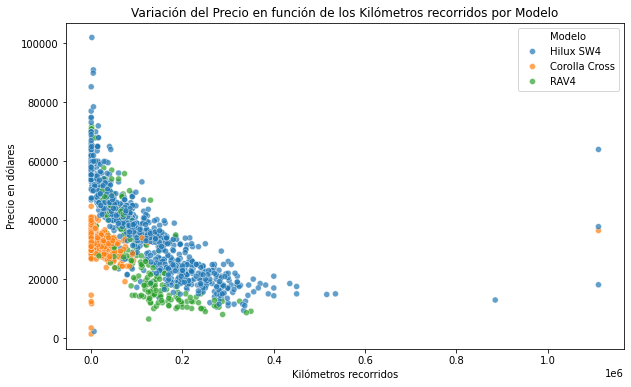

In [4]:
plt.figure(figsize=(10, 6))

# Plotting the relationship between Kilómetros and Precio, with different colors for each Modelo
sns.scatterplot(data=df_dev, x='Kilómetros', y='Precio', hue='Modelo', alpha=0.7)

# Adding titles and labels
plt.title('Variación del Precio en función de los Kilómetros recorridos por Modelo')
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Precio en dólares')
plt.legend(title='Modelo')

# Showing the plot
plt.show()

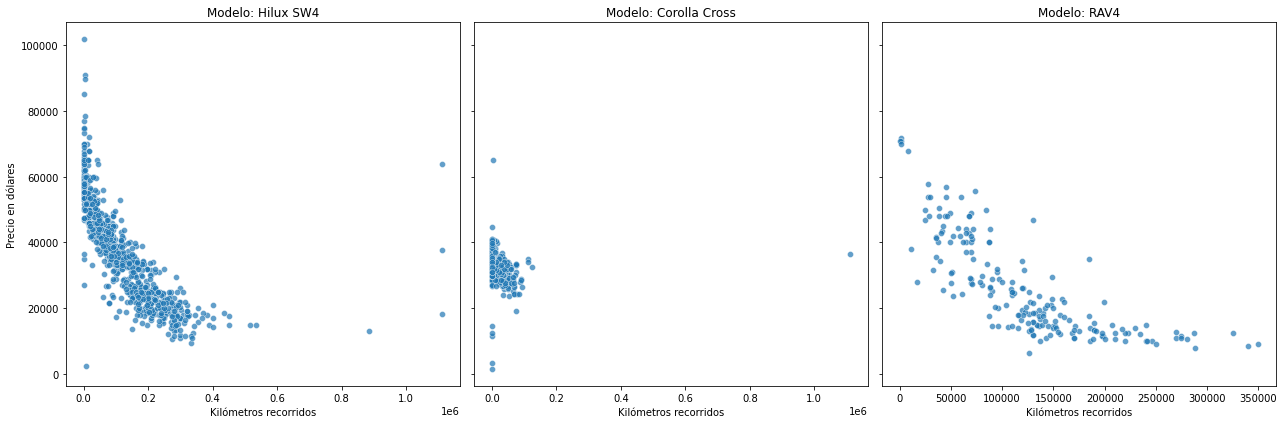

In [5]:
# List of unique models
models = df_dev['Modelo'].unique()

# Setting up the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Looping through each model and creating a subplot
for i, model in enumerate(models):
    sns.scatterplot(data=df_dev[df_dev['Modelo'] == model], 
                    x='Kilómetros', y='Precio', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Modelo: {model}')
    axes[i].set_xlabel('Kilómetros recorridos')
    axes[i].set_ylabel('Precio en dólares')

# Adjusting layout
plt.tight_layout()
plt.show()

Filtramos algunos outliers para visualizar mejor Corolla Cross

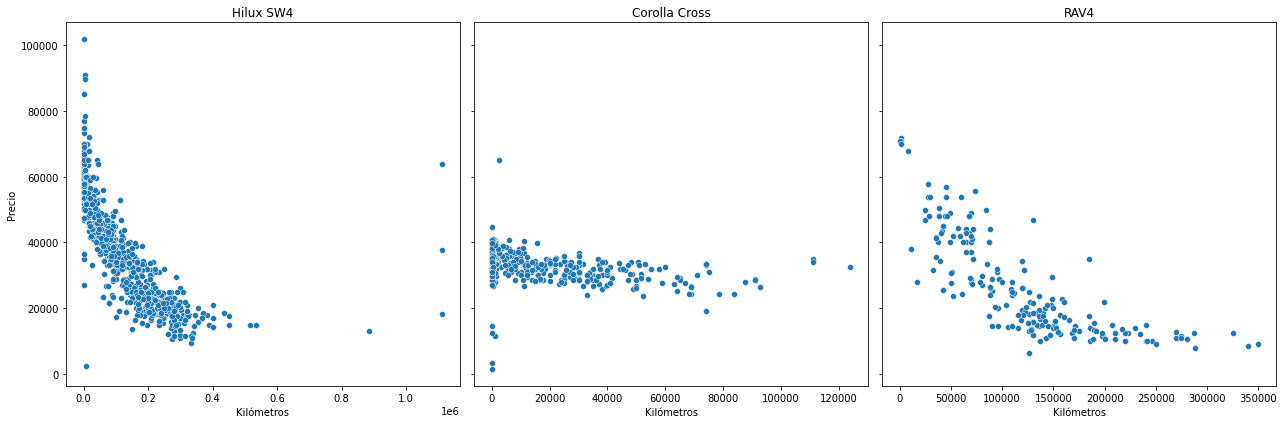

In [8]:
# Filtrando el outlier para Corolla Cross
df_filtered = df_dev[~((df_dev['Modelo'] == 'Corolla Cross') & (df_dev['Kilómetros'] >= 1e6))]

# Creando los subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

modelos = ['Hilux SW4', 'Corolla Cross', 'RAV4']

for i, modelo in enumerate(modelos):
    sns.scatterplot(x='Kilómetros', y='Precio', data=df_filtered[df_filtered['Modelo'] == modelo], ax=axs[i])
    axs[i].set_title(f'{modelo}')
    axs[i].set_xlabel('Kilómetros')
    axs[i].set_ylabel('Precio')

plt.tight_layout()
plt.show()

b) Compara la distribución de precios en dólares entre los distintos modelos de SUV. ¿Identificas la presencia de outliers? ¿Qué acciones tomarías con ellos?

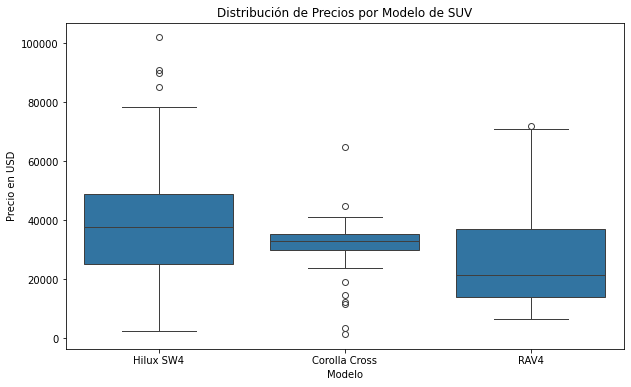

In [9]:
# Crear un boxplot para comparar la distribución de precios entre los diferentes modelos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modelo', y='Precio', data=df_dev)

# Añadir título y etiquetas
plt.title('Distribución de Precios por Modelo de SUV')
plt.xlabel('Modelo')
plt.ylabel('Precio en USD')

# Mostrar el gráfico
plt.show()

Vamos a limpiar el dataset. Aquellas SUVs con precio < 1000 USD serán eliminados.

In [12]:
df_dev_filtered = df_dev[df_dev['Precio'] >= 2000]

df_dev_filtered.to_csv('toyota_dev_filtered.csv', index=False)

# Mostrar la cantidad de registros eliminados
num_removed = df_dev.shape[0] - df_dev_filtered.shape[0]
print(f"Se eliminaron {num_removed} registros con precio menor a 2000 USD.")

Se eliminaron 1 registros con precio menor a 2000 USD.


c) Analiza la distribución del precio en dólares según el año del vehículo.

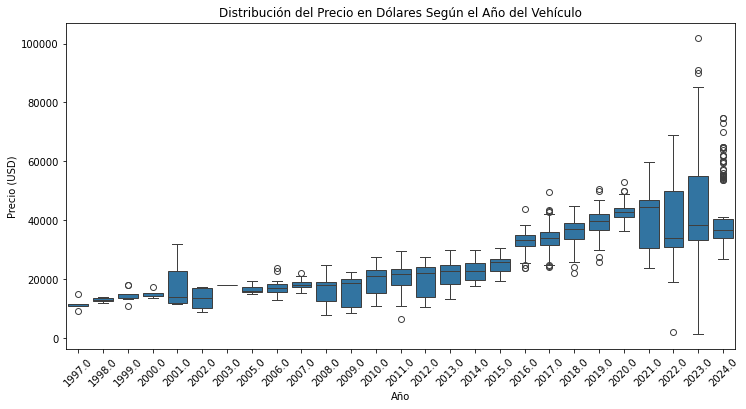

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dev, x='Año', y='Precio')
plt.title('Distribución del Precio en Dólares Según el Año del Vehículo')
plt.xlabel('Año')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

d) Evalúa la utilidad de la variable categórica **Color**. ¿Existen diferencias significativas en el precio según el color del vehículo? ¿Hay algún modelo cuyo precio parezca estar influenciado por el color?

<ipython-input-16-81d510b24a41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dev, x='Color', y='Precio', palette='Set2')


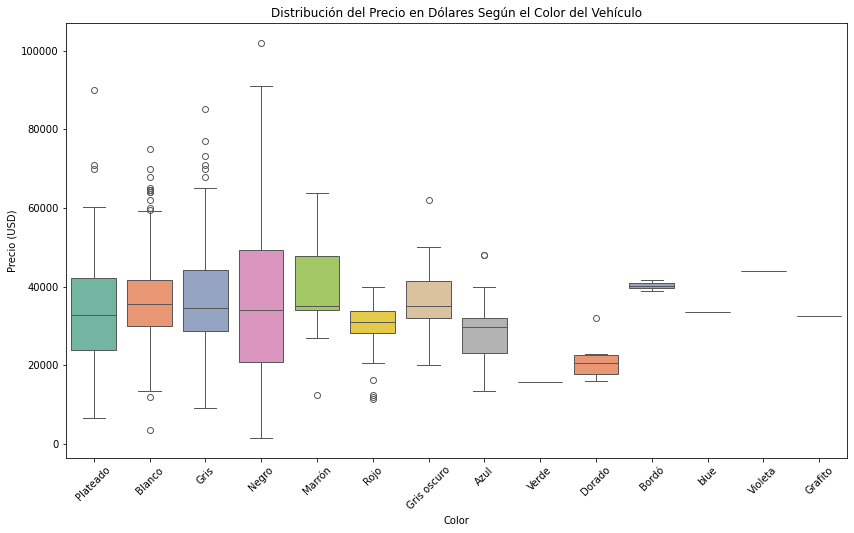

In [16]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_dev, x='Color', y='Precio', palette='Set2')
plt.title('Distribución del Precio en Dólares Según el Color del Vehículo')
plt.xlabel('Color')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

Por ahora vamos a decidir eliminar esta columna del dataset.

In [17]:
# Eliminar la columna 'Color'
df_dev_filtered = df_dev_filtered.drop(columns=['Color'])

# Guardar el DataFrame resultante en un archivo CSV
df_dev_filtered.to_csv('toyota_dev_filtered.csv', index=False)

e) Compara cómo varía el precio según el tipo de combustible utilizado. ¿Hay algún modelo cuyo precio esté condicionado por el tipo de combustible?

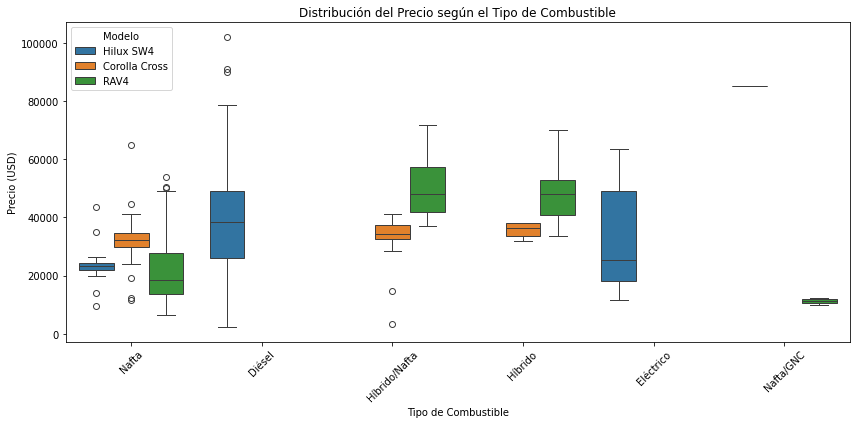

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dev_filtered, x='Tipo de combustible', y='Precio', hue='Modelo')
plt.title('Distribución del Precio según el Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

Vamos a unificar las diferentes categorias:

In [19]:
# Unificar categorías en el dataframe
df_dev_filtered['Tipo de combustible'] = df_dev_filtered['Tipo de combustible'].replace({
    'Híbrido/Nafta': 'Híbrido',
    'Nafta/GNC': 'Nafta',
    'Nafta': 'Nafta',
    'Diésel': 'Diésel',
    'Híbrido': 'Híbrido',
    'Eléctrico': 'Eléctrico'
})

# Guardar el dataframe actualizado
df_dev_filtered.to_csv('toyota_dev_filtered.csv', index=False)

Volvemos a graficar el filtrado:

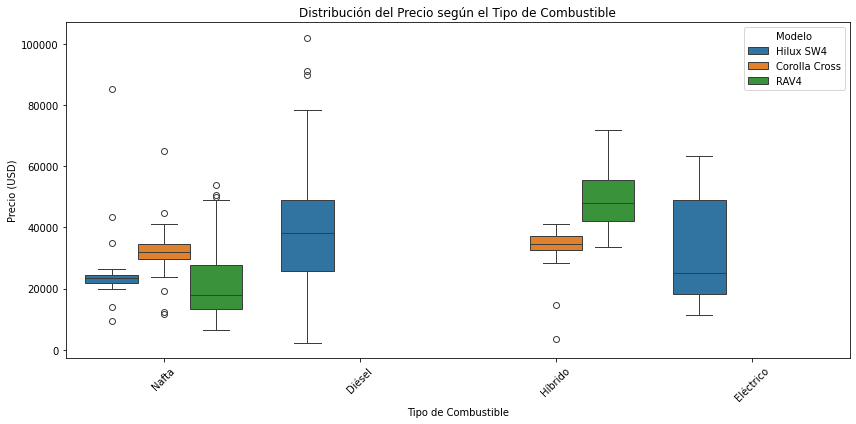

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dev_filtered, x='Tipo de combustible', y='Precio', hue='Modelo')
plt.title('Distribución del Precio según el Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

f) Compara los precios en función del tipo de transmisión del vehículo.

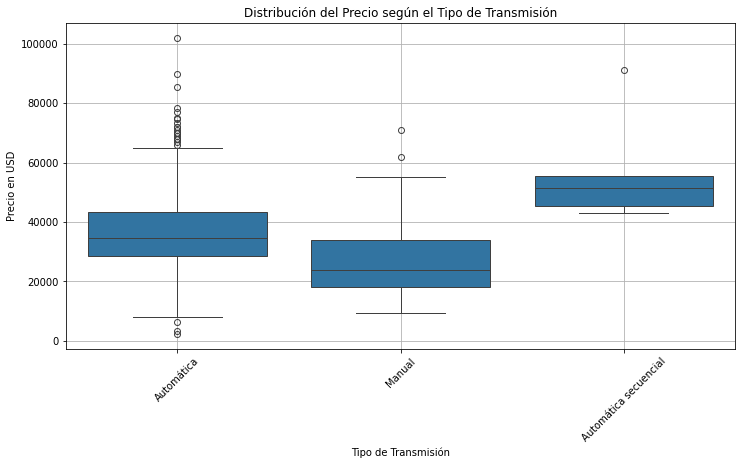

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmisión', y='Precio', data=df_dev_filtered)
plt.title('Distribución del Precio según el Tipo de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Precio en USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

g) Analiza la distribución de los modelos por año. ¿Puedes identificar si ciertos modelos son más comunes en años específicos?

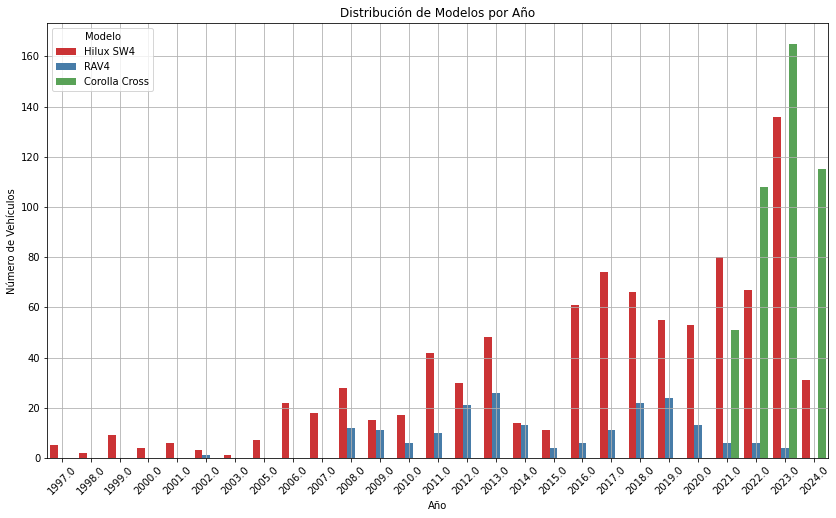

In [23]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_dev_filtered, x='Año', hue='Modelo', palette='Set1')
plt.title('Distribución de Modelos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45)
plt.legend(title='Modelo')
plt.grid(True)
plt.show()

2. **División del Dataset**

   Dentro de un archivo llamado `data_splitting.py`:

   - Implementa la función `train_val_split(...)` que divida el set de desarrollo en dos subconjuntos: uno para entrenamiento (train) y otro para validación (validate). Asegúrate de que la división sea representativa y evite que un solo grupo de muestras se concentre en un solo subconjunto.
   - Implementa la función `cross_val(...)` que realice la validación cruzada (cross-validation) con `k` folds sobre el set de desarrollo.

In [24]:
from data_splitting import train_val_split, cross_val

train_df, val_df = train_val_split(df_dev_filtered, train_size=0.7, random_state=42)

3. **Preprocesamiento del Dataset**

    Dentro de un archivo llamado `preprocessing.py`:
    - Implementar la función`one_hot_encoder(...)` que realice la codificación one-hot de las variables categóricas del dataset.
    - OPCIONAL: Implementar alguna otra función de preprocesamiento que considere útil, como por ejemplo la normalización o estandarización de las características numéricas del dataset, o la imputación de valores faltantes.

In [ ]:
from preprocessing import one_hot_encoder


4. **Implementación de Métricas**

   Dentro de un archivo llamado `metrics.py`:

   - Implementa la función `RMSE(...)` que calcule el error cuadrático medio (Root Mean Squared Error) entre las predicciones y los valores reales.
   - Implementa la función `MAE(...)` que calcule el error absoluto medio (Mean Absolute Error) entre las predicciones y los valores reales.
   - Implementa la función `R2(...)` que calcule el coeficiente de determinación (R-squared) para evaluar la proporción de la varianza en los valores reales explicada por las predicciones.

In [ ]:
from metrics import RMSE, MAE, R2

5. **Modelos de Regresión**

   Dentro de un archivo llamado `models.py`:

   - Implementa un modelo de regresión lineal (`LinearRegression`) que estime el precio de venta de una SUV de Toyota utilizando las características disponibles en el dataset.
   - Implementa un modelo de regresión no-lineal (`NonLinearRegression`) utilizando regresores con parámetros no-lineales que deberás seleccionar o desarrollar según tu criterio. **Nota:** El objetivo es modelar el precio de venta de SUVs, por lo que debes elegir un enfoque que capture de manera efectiva la relación no-lineal entre las variables.
   - Implementa un modelo de regresión localmente ponderada (`LocallyWeightedRegression`) que ajuste el modelo de regresión en función de los datos cercanos a la predicción.

In [ ]:
from models import LinearRegression, NonLinearRegression, LocallyWeightedRegression

6. **Evaluación con División Train-Val**

   Utiliza la función `train_val_split(...)` para dividir el dataset de desarrollo en conjuntos de entrenamiento (70%) y validación (30%). Entrena los modelos `LinearRegression`, `NonLinearRegression`, y `LocallyWeightedRegression`, y reporta las métricas RMSE, MAE y $R^2$.

In [ ]:
# COMPLETAR CON TU CÓDIGO AQUÍ

7. **Evaluación con Validación Cruzada**

   Utiliza el dataset de desarrollo y la función `cross_val(...)` con `k=5` para entrenar los modelos `LinearRegression`, `NonLinearRegression`, y `LocallyWeightedRegression`. Reporta las métricas RMSE, MAE y $R^2$.

In [ ]:
# COMPLETAR CON TU CÓDIGO AQUÍ

8. **Comparación de Resultados**

   Elabora una tabla comparativa de los resultados obtenidos en los dos pasos anteriores. Realiza una discusión breve en la que analices las diferencias entre los modelos y expliques los motivos detrás de los resultados observados.

In [ ]:
# COMPLETAR CON TU CÓDIGO AQUÍ

9. **Evaluación en el Conjunto de Prueba**

    Evalúa el rendimiento de los modelos LinearRegression, NonLinearRegression, y LocallyWeightedRegression sobre el conjunto de prueba y reporta las métricas RMSE, MAE y $R^2$.

In [ ]:
# COMPLETAR CON TU CÓDIGO AQUÍ